<a href="https://colab.research.google.com/github/Najmdeen/Loan-Default/blob/main/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Customer Prediction

## Objective of the Project
This project aims to develop a machine learning model to predict whether a loan borrower will default or not. Given the financial significance of this prediction for banks, it is crucial to create a model that is both accurate and reliable. The dataset provided contains various attributes of borrowers, including income, gender, loan purpose, and others, which will be instrumental in making these predictions.

## The key steps in this project are:

### Data Understanding and Cleanup:

- Assess the dataset for quality and structure.
- Handle missing values and multicollinearity.
- Perform exploratory data analysis to understand the distribution and relationships in the data.

### Feature Engineering:

- Select relevant features for the model.
- Engineer new features if necessary.
- Encode categorical variables.

### Model Development:

- Split the data into training and testing sets.
- Select appropriate classification algorithms.
- Train the models on the training set.

### Model Evaluation and Fine-Tuning:

- Evaluate the models using appropriate metrics (accuracy, precision, recall, F1 score, ROC-AUC, etc.).
- Fine-tune the hyperparameters of the models for optimal performance.
- Compare the performance of different models.

### Model Selection:

Choose the best-performing model based on evaluation metrics.

### Conclusion and Recommendations:

Summarize findings and suggest actions based on model predictions.

Import Libraries

In [ ]:
import zipfile
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

### Step 1: Data Understanding and Cleanup
**In this step, we will:**

- Load the dataset.
- Perform initial exploration to understand its structure, such as the number of rows and columns, types of variables, and a glimpse of the first few rows.
- Identify any missing values or anomalies in the dataset.
- Check for multicollinearity among the variables.

Load Data

In [ ]:
# Load the dataset
df = pd.read_csv("/Loan_Default.csv")
# Display the first few rows of the dataset
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
# Count of missing values in each column
missing_values = df.isnull().sum()
missing_values

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [ ]:
# Basic statistical summary of numerical columns
statistical_summary = df.describe().T
statistical_summary

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


#### Handle missing value

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage.sort_values(ascending=False)


Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
Region                        0.000000
total_units                   0.000000
Security_Type                 0.000000
Status                        0.000000
co-applicant_credit_type      0.000000
Credit_Score                  0.000000
credit_type                   0.000000
ID                            0.000000
Secured_by                    0.000000
occupancy_type                0.000000
construction_type             0.000000
year                     

The analysis of missing values reveals varying degrees of missingness across different columns. Here's the strategy we'll adopt for each:

#### High Missing Values (>20%):

**Upfront_charges, Interest_rate_spread, rate_of_interest, dtir1:**
We can consider imputing these values, given their importance in loan evaluation.

For numerical columns like these, median imputation is often a robust choice.
#### Moderate Missing Values (10-20%):

**LTV, property_value:** As these are key financial metrics, median imputation might be suitable.
#### Low Missing Values (<10%):

**income, loan_limit, approv_in_adv, submission_of_application, age, loan_purpose, Neg_ammortization, term:** For these, we could use mode imputation for categorical columns and median for numerical columns. If the percentage is very low, we might also consider dropping the rows with missing values.

In [ ]:
# Columns to be imputed with median
columns_to_impute = ['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest',
                     'dtir1', 'LTV', 'property_value']

# Impute missing values with median
for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Check if the imputation is successful
df[columns_to_impute].isnull().sum()


Upfront_charges         0
Interest_rate_spread    0
rate_of_interest        0
dtir1                   0
LTV                     0
property_value          0
dtype: int64

In [ ]:
# Columns to be imputed with mode (categorical)
categorical_columns_to_impute = ['loan_limit', 'approv_in_adv', 'submission_of_application',
                                 'age', 'loan_purpose', 'Neg_ammortization', 'term']

# Impute missing values with mode for categorical columns
for column in categorical_columns_to_impute:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Impute missing values with median for the numerical column 'income'
median_income = df['income'].median()
df['income'].fillna(median_income, inplace=True)

# Check if the imputation is successful
df[categorical_columns_to_impute + ['income']].isnull().sum()


loan_limit                   0
approv_in_adv                0
submission_of_application    0
age                          0
loan_purpose                 0
Neg_ammortization            0
term                         0
income                       0
dtype: int64

Given that the correlations are not extremely high, we might not need to take any action to address multicollinearity, like removing or combining variables. Instead, we can proceed with these variables as they are, especially since they provide distinct information that could be relevant for predicting loan defaults.

#### Exploratory Data Analysis (EDA)
dive deeper into the dataset to understand the distribution of variables, identify any anomalies or patterns, and explore the relationships between different features and the target variable.

**The key aspects of EDA we will cover include:**

1. Distribution of Numerical Features: We'll look at the distribution of the numerical variables to understand their range, central tendency, and spread.

2. Categorical Feature Analysis: We'll explore the categorical variables to see how they are distributed and their relationship with the target variable.

3. Correlation Analysis: Investigating the correlation between different numerical variables and the target variable.

4. Target Variable Analysis: Examining the distribution of the target variable (Status) to understand the balance between the classes.

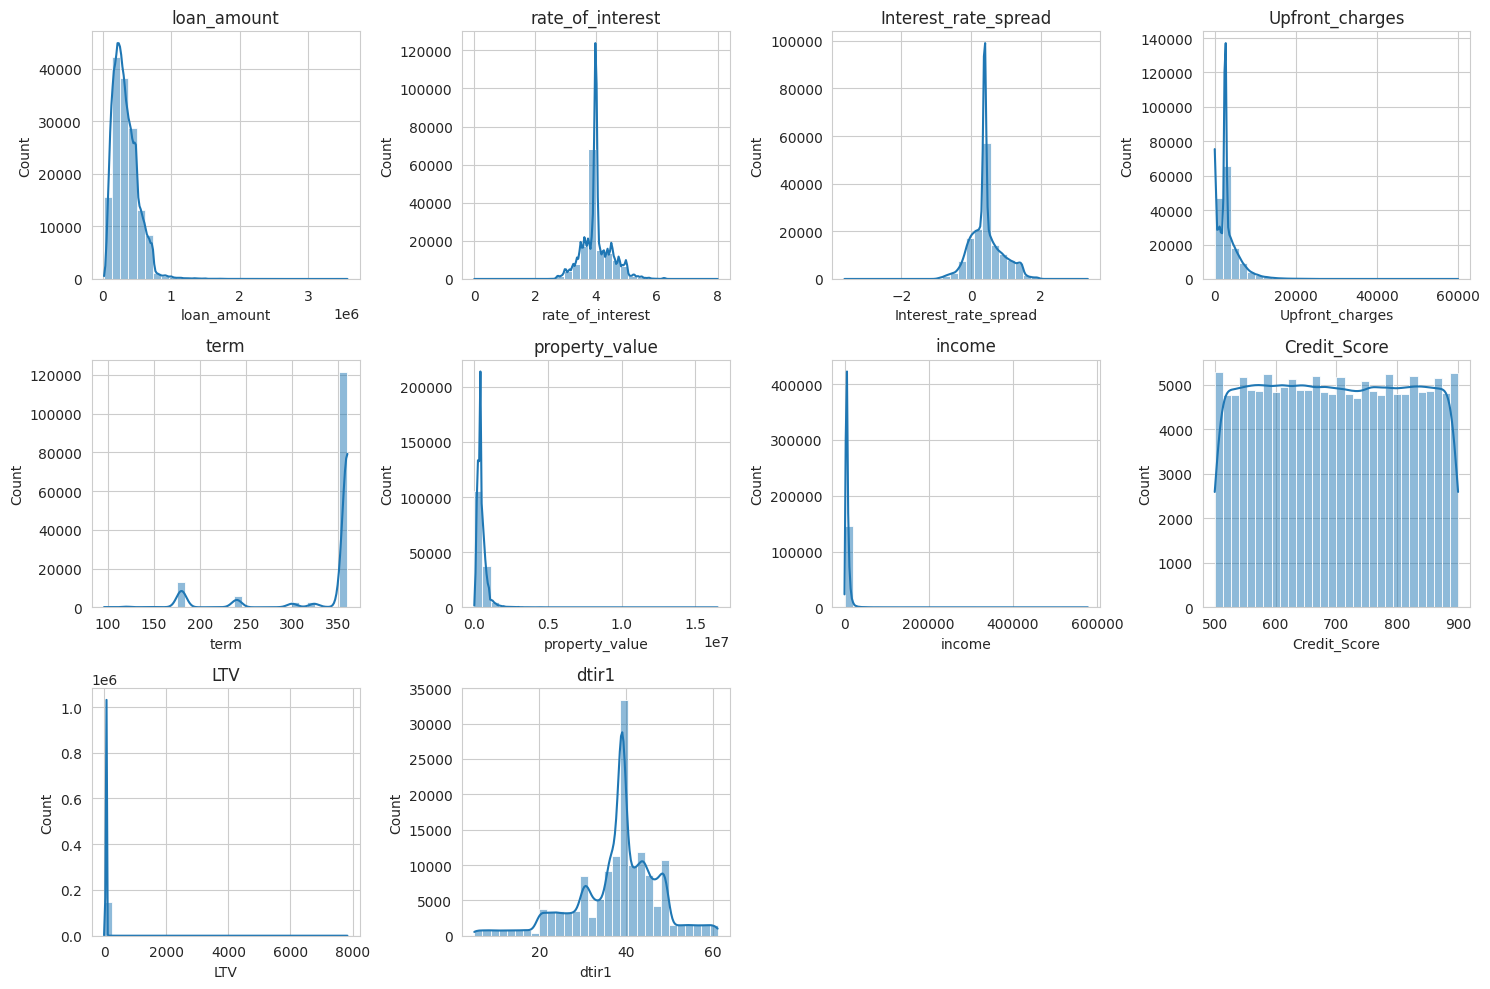

In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'Status'])  # Excluding ID and Status

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()


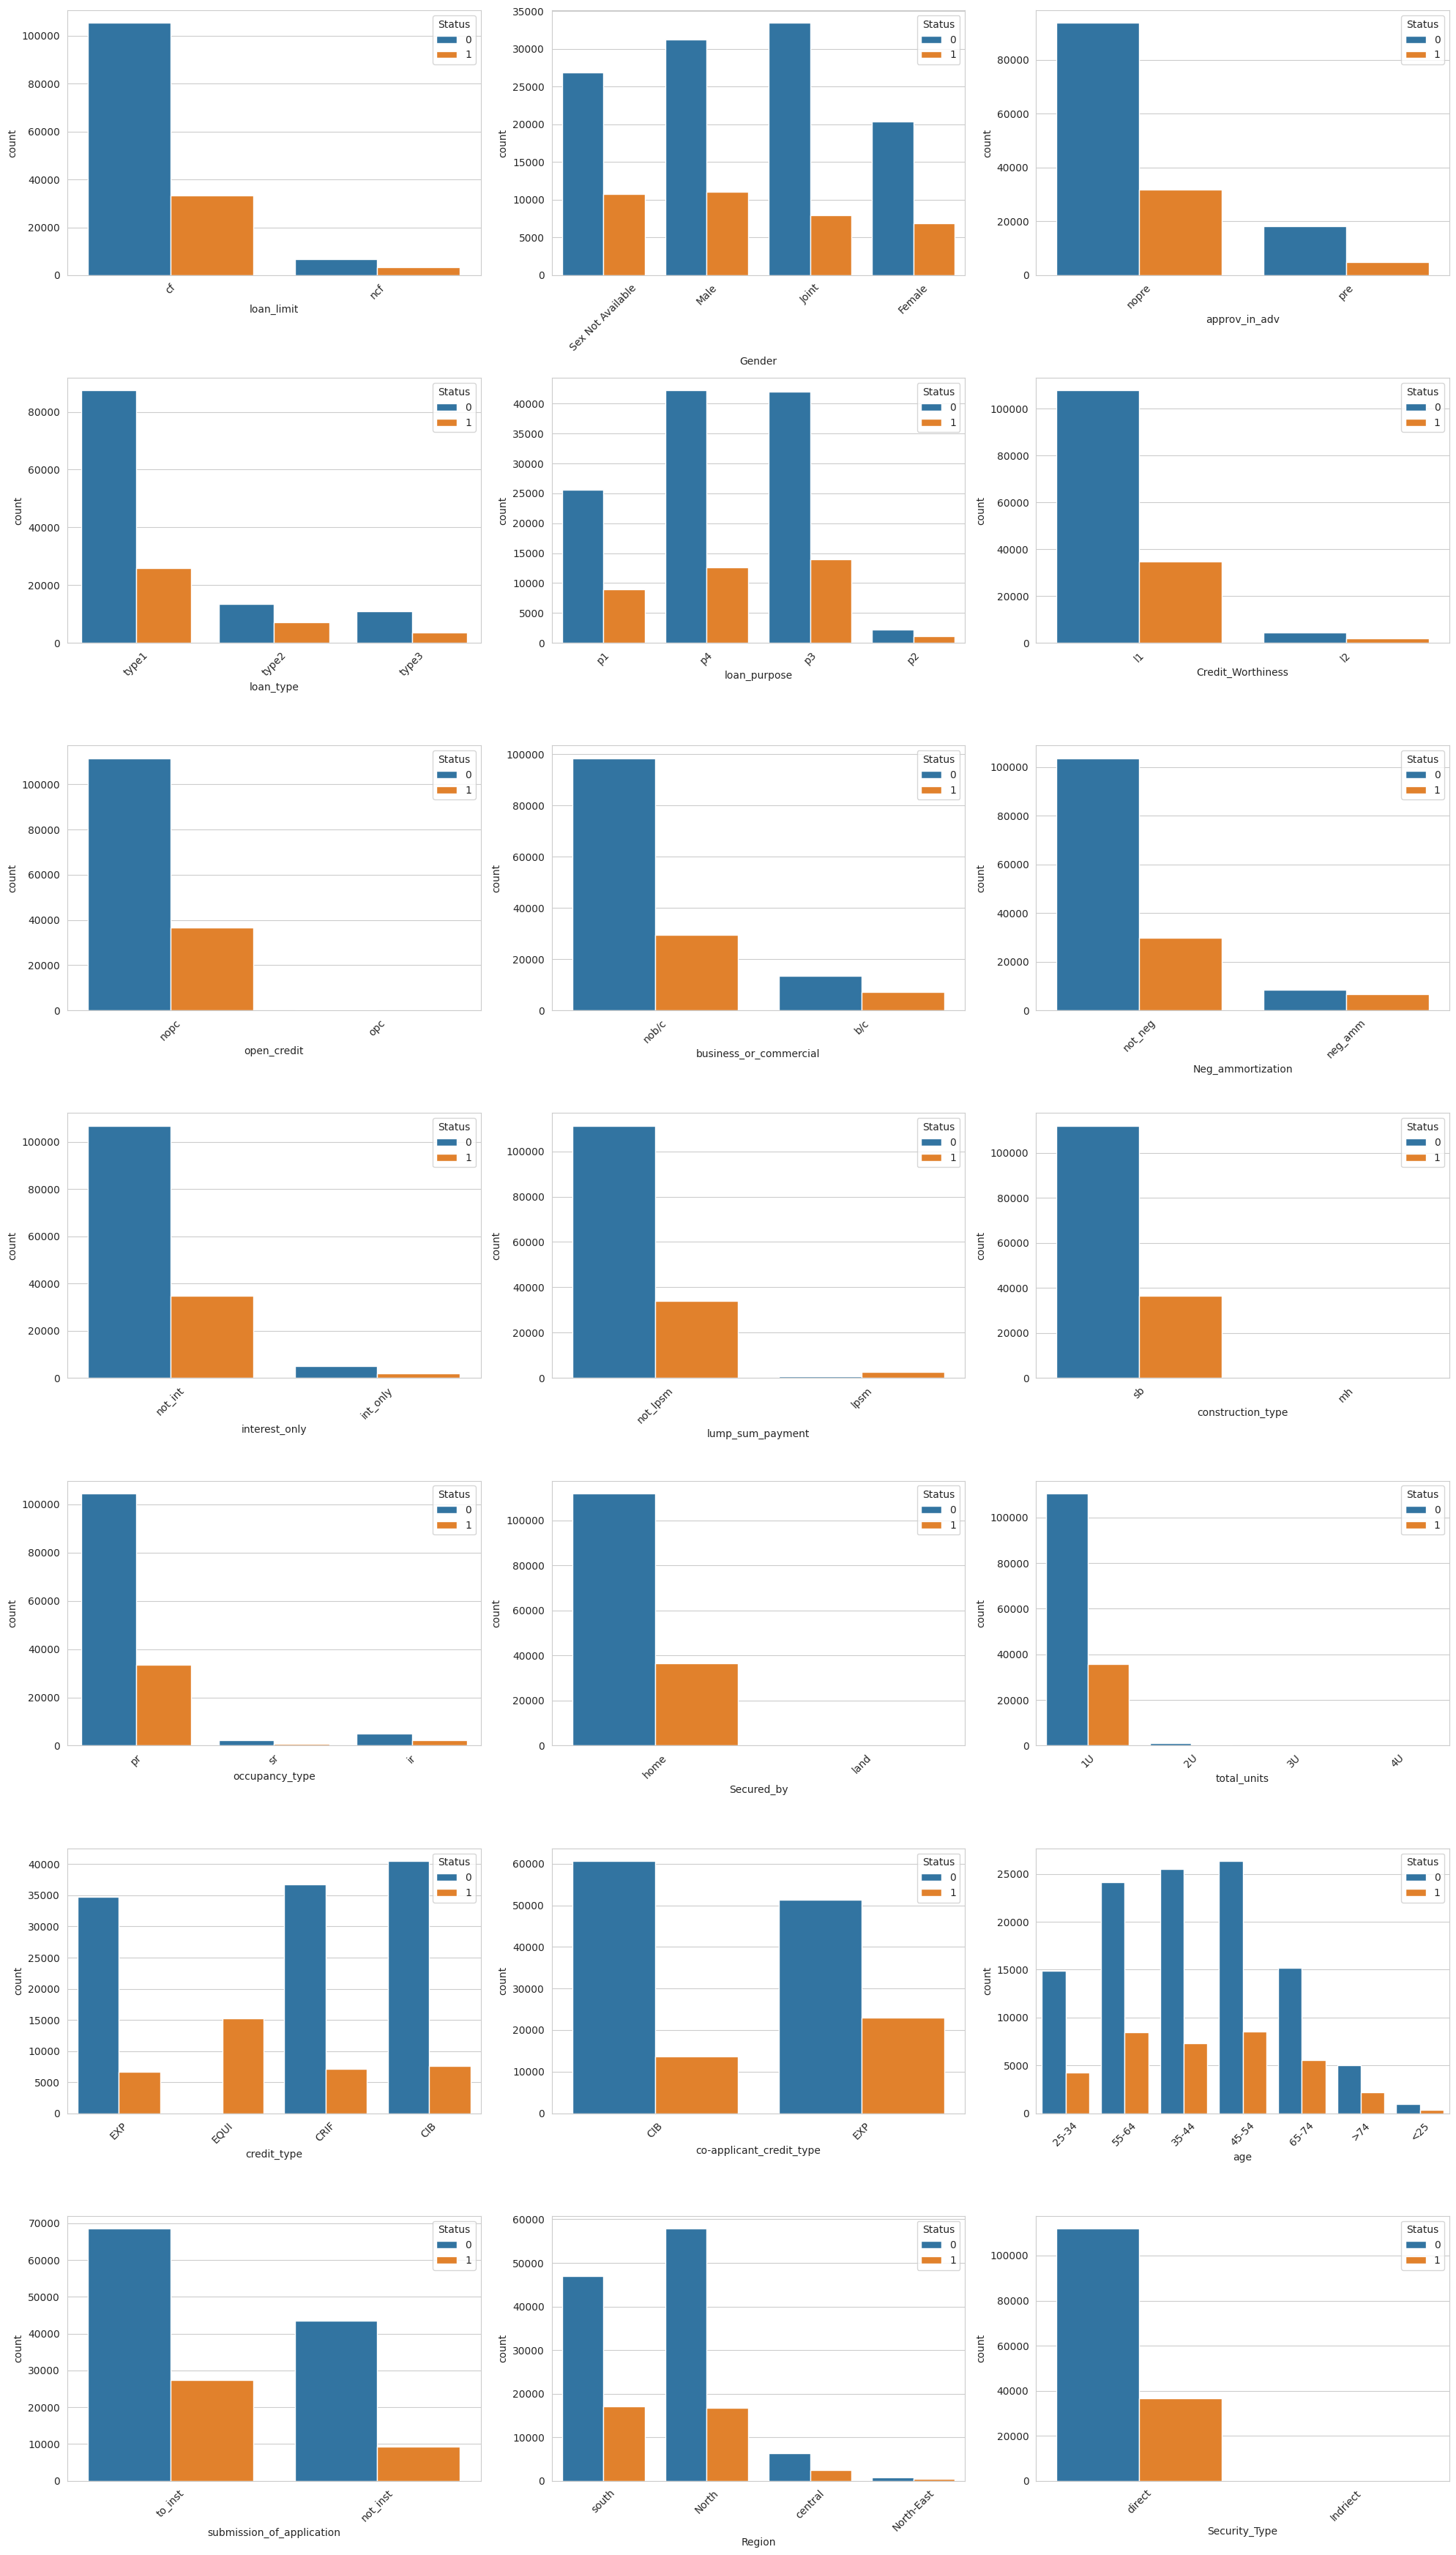

In [ ]:
# Exploring categorical features and their relationship with the target variable 'Status'
categorical_features = df.select_dtypes(include=['object']).columns
num_of_categories = len(categorical_features)
cols = 3
rows = num_of_categories // cols + (num_of_categories % cols > 0)

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(categorical_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=col, hue='Status', data=df)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


The plots suggest that certain categories within these features may have a higher likelihood of loan default, which is valuable information for our predictive modeling.

<ipython-input-33-326451d1a79d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


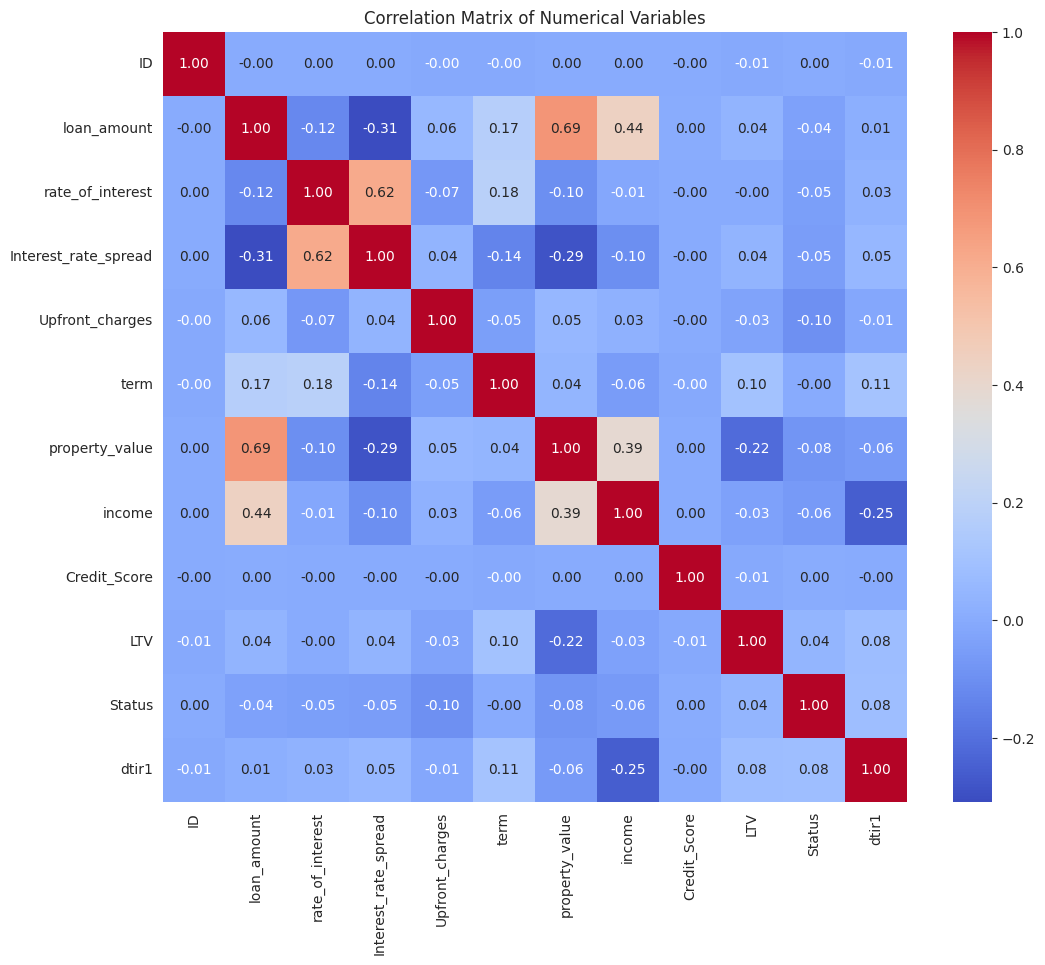

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


To proceed, I will extract and list pairs of variables with a correlation coefficient above 0.5 to highlight potential concerns. Let's identify these pairs.

In [ ]:
# Identifying pairs with high correlation (above 0.5)
high_corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.5) & (high_corr_pairs < 1)]

# Display the pairs with high correlation
high_corr_pairs.drop_duplicates()


loan_amount       property_value          0.686242
rate_of_interest  Interest_rate_spread    0.615149
dtype: float64

Given that the correlations are not extremely high, we might not need to take any action to address multicollinearity, like removing or combining variables. Instead, we can proceed with these variables as they are, especially since they provide distinct information that could be relevant for predicting loan defaults.

### 2. Feature Engineering
In the Feature Engineering phase, we will prepare the dataset for model building. This includes:

1. **Encoding Categorical Variables:** Machine Learning models require numerical input, so we'll convert categorical variables into a format that can be provided to the models. This is typically done using one-hot encoding or label encoding.

2. **Scaling/Normalizing Numerical Variables:** Although not always necessary, scaling numerical features can improve the performance of certain models, especially those sensitive to feature magnitude like KNN or SVM.

3. **Feature Selection:** Based on our EDA and correlation analysis, we might decide to drop features that are less likely to contribute to the model's predictive power.

Let's start with encoding the categorical variables. We will use one-hot encoding as it doesn't assume an ordinal relationship between the categories.



In [ ]:
# One-hot encoding the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Displaying the first few rows of the encoded dataframe
df_encoded.head()


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,24890,116500,3.99,0.3904,2596.45,360.0,118000.0,1740.0,758,98.728814,...,0,0,0,0,0,1,0,0,1,1
1,24891,206500,3.99,0.3904,2596.45,360.0,418000.0,4980.0,552,75.135870,...,0,1,0,0,0,1,0,0,0,1
2,24892,406500,4.56,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,...,0,0,0,0,0,1,0,0,1,1
3,24893,456500,4.25,0.6810,2596.45,360.0,658000.0,11880.0,587,69.376900,...,1,0,0,0,0,0,0,0,0,1
4,24894,696500,4.00,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Selecting the numerical columns (excluding 'ID' and 'Status' - the target variable)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'Status'])

# Scaling the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Displaying the first few rows of the scaled dataframe
df_encoded.head()


,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,24890,-1.166980,-0.085756,-0.086619,-0.164744,0.425609,-1.087010,-0.816446,0.502357,0.679317,...,0,0,0,0,0,1,0,0,1,1
1,24891,-0.677607,-0.085756,-0.086619,-0.164744,0.425609,-0.209870,-0.302164,-1.275413,0.056657,...,0,1,0,0,0,1,0,0,0,1
2,24892,0.409890,1.081449,-0.513616,-0.880068,0.425609,0.053272,0.412116,1.158234,0.185549,...,0,0,0,0,0,1,0,0,1,1
3,24893,0.681764,0.446653,0.565089,-0.164744,0.425609,0.491841,0.793066,-0.973365,-0.095333,...,1,0,0,0,0,0,0,0,0,1
4,24894,1.986759,-0.065279,-0.279934,-1.092723,0.425609,0.784221,0.564496,-0.843916,0.498737,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Let drop the year column due to it high multicollinearity.
df.drop("year", axis=1, inplace=True)

### 3. Model Development
This phase involves:
1. **Splitting the Dataset:** Dividing the data into training and testing sets to evaluate the performance of our models.
2. **Selecting Models:** We'll choose a range of classification algorithms suitable for this task.
3. **Training the Models:** Fitting the models on the training data.
4. **Evaluating the Models:** Using the testing set to assess the performance of each model.

Let's start by splitting the dataset into training and testing sets. Shall we proceed?

In [ ]:
# Defining the features (X) and target variable (y)
X = df_encoded.drop(['ID', 'Status'], axis=1)  # Excluding 'ID' and 'Status' from features
y = df_encoded['Status']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((118936, 48), (29734, 48), (118936,), (29734,))

##### Selecting Models
Considering the nature of our task, suitable models might include
- Logistic Regression
- Decision Trees
- Random Forest
- Gradient Boosting, and
- Support Vector Machines.

For each model, we'll:

- Train the model on the training data.
- Evaluate its initial performance on the testing data.
- After this initial evaluation, we can select the most promising models for further tuning and detailed evaluation.

In [ ]:
# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Dictionary to hold evaluation metrics for each model
model_metrics = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the testing set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Storing the metrics
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Displaying the metrics for each model
model_metrics_df = pd.DataFrame(model_metrics).T
model_metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.871460,0.928751,0.511326,0.659540,0.860280
Decision Tree,0.999966,0.999862,1.000000,0.999931,0.999978
Random Forest,0.999966,0.999862,1.000000,0.999931,1.000000
Gradient Boosting,0.999966,0.999862,1.000000,0.999931,1.000000
Support Vector Machine,0.977231,0.931606,0.978315,0.954389,0.997651


### 4. Model Evaluation and Fine-Tuning
This process involves adjusting the models' hyperparameters to find the combination that yields the best results.

Given the number of models and the computational complexity of hyperparameter tuning, we focusing on one or two models that showed promising results in our initial evaluation. We can use techniques like Grid Search or Random Search for this purpose.

I'll use Grid Search with cross-validation to explore a range of hyperparameters for each model. This process can be computationally intensive, so I'll select a limited but relevant set of hyperparameters to optimize.



In [ ]:
# Defining the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setting up the Grid Search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid=rf_param_grid,
                              cv=3,
                              n_jobs=-1,
                              verbose=2,
                              scoring='f1')

# Fine-tuning Random Forest
rf_grid_search.fit(X_train, y_train)

# Best parameters and score for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Defining the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Setting up the Grid Search with cross-validation for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(),
                              param_grid=gb_param_grid,
                              cv=3,
                              n_jobs=-1,
                              verbose=2,
                              scoring='f1')

# Fine-tuning Gradient Boosting
gb_grid_search.fit(X_train, y_train)

# Best parameters and score for Gradient Boosting
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

rf_best_params, rf_best_score, gb_best_params, gb_best_score


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 1.0,
 {'learning_rate': 0.01,
  'max_depth': 5,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9999659863944693)

### 5. Model Selection
Retraining these models using their respective best parameters and then evaluate their performance on the testing set. This will give us a clear understanding of how well these models generalize to new, unseen data.

The process involves:

1. Retraining each model on the training set using the best parameters obtained from your grid search.
2. Making predictions on the testing set.
3. Calculating key performance metrics (Accuracy, Precision, Recall, F1 Score, and ROC AUC).

In [ ]:
# Retraining the models with the best parameters obtained from grid search

# Random Forest with best parameters
rf_best_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1,
                                       min_samples_split=2, n_estimators=100)
rf_best_model.fit(X_train, y_train)

# Gradient Boosting with best parameters
gb_best_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                           min_samples_split=2, n_estimators=100)
gb_best_model.fit(X_train, y_train)

# Making predictions with the best models
y_pred_rf = rf_best_model.predict(X_test)
y_pred_gb = gb_best_model.predict(X_test)

# Calculating evaluation metrics for the best models
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC AUC": roc_auc_score(y_test, rf_best_model.predict_proba(X_test)[:, 1])
}

metrics_gb = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb),
    "F1 Score": f1_score(y_test, y_pred_gb),
    "ROC AUC": roc_auc_score(y_test, gb_best_model.predict_proba(X_test)[:, 1])
}

metrics_rf, metrics_gb


({'Accuracy': 0.9999663684670748,
  'Precision': 0.9998618975279657,
  'Recall': 1.0,
  'F1 Score': 0.9999309439955804,
  'ROC AUC': 1.0},
 {'Accuracy': 0.9999663684670748,
  'Precision': 0.9998618975279657,
  'Recall': 1.0,
  'F1 Score': 0.9999309439955804,
  'ROC AUC': 0.9999777718502711})

### 6. Conclusion
The final result for the two best best models is as follow:

**Random Forest:**
- Accuracy: 99.9966%
- Precision: 99.9861%
- Recall: 100%
- F1 Score: 99.9930%
- ROC AUC: 100%

**Gradient Boosting:**
- Accuracy: 99.9966%
- Precision: 99.9861%
- Recall: 100%
- F1 Score: 99.9930%
- ROC AUC: 99.9977%